# **1. Data Visualization**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
url = "/content/drive/MyDrive/football_data.csv"
data = pd.read_csv(url)

In [18]:
data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",None,2021,5'7,159lbs,90,90,90,94,95,95,95,94,95,95,95,93,...,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",None,2022,6'2,183lbs,94,94,94,92,93,93,93,92,91,91,91,91,...,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",None,2022,5'9,150lbs,87,87,87,92,92,92,92,92,92,92,92,91,...,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",None,2020,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",None,2023,5'11,154lbs,85,85,85,90,90,90,90,90,91,91,91,91,...,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,CM,22.0,"May 3, 2017",None,2019,5'9,134lbs,44,44,44,46,46,46,46,46,47,47,47,46,...,47,47,47,47,47,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0

In [5]:
data.describe

<bound method NDFrame.describe of        Unnamed: 0      ID  ... GKReflexes  Release Clause
0               0  158023  ...        8.0         €226.5M
1               1   20801  ...       11.0         €127.1M
2               2  190871  ...       11.0         €228.1M
3               3  193080  ...       94.0         €138.6M
4               4  192985  ...       13.0         €196.4M
...           ...     ...  ...        ...             ...
18202       18202  238813  ...        9.0           €143K
18203       18203  243165  ...       12.0           €113K
18204       18204  241638  ...       13.0           €165K
18205       18205  246268  ...        9.0           €143K
18206       18206  246269  ...        9.0           €165K

[18207 rows x 89 columns]>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

Data Preprocessing

In [12]:
data.isnull().sum()


Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [ ]:
def data_clean():
    data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
    data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
    data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
    data['Curve'].fillna(data['Curve'].mean(), inplace = True)
    data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
    data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
    data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
    data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
    data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
    data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
    data['Weight'].fillna('200lbs', inplace = True)
    data['Contract Valid Until'].fillna(2019, inplace = True)
    data['Height'].fillna("5'11", inplace = True)
    data['Loaned From'].fillna('None', inplace = True)
    data['Joined'].fillna('Jul 1, 2018', inplace = True)
    data['Jersey Number'].fillna(8, inplace = True)
    data['Body Type'].fillna('Normal', inplace = True)
    data['Position'].fillna('ST', inplace = True)
    data['Club'].fillna('No Club', inplace = True)
    data['Work Rate'].fillna('Medium/ Medium', inplace = True)
    data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
    data['Weak Foot'].fillna(3, inplace = True)
    data['Preferred Foot'].fillna('Right', inplace = True)
    data['International Reputation'].fillna(1, inplace = True)
    data['Wage'].fillna('€200K', inplace = True)

data_clean()
def updatePosRate(x1):
  if(x1 == None or x1 == 0 ): 
    return 0
  if( type(x1) == float or type(x1) == int):
    return int(x1)  
  # print(x1)
  # x =''
  x=x1
  x = x.split('+')
  # print(x)
  x = int(x[0]) + int(x[1])
  return int(x)
for i in range(28,54):
  data.iloc[:,i] = data.iloc[:,i].apply(lambda x: updatePosRate(x))


In [16]:
data.fillna(0, inplace = True)


**• Plot histograms of count of players on the basis of some attributes like height,'Weight'**


In [ ]:
sorted(data['Height'].unique())

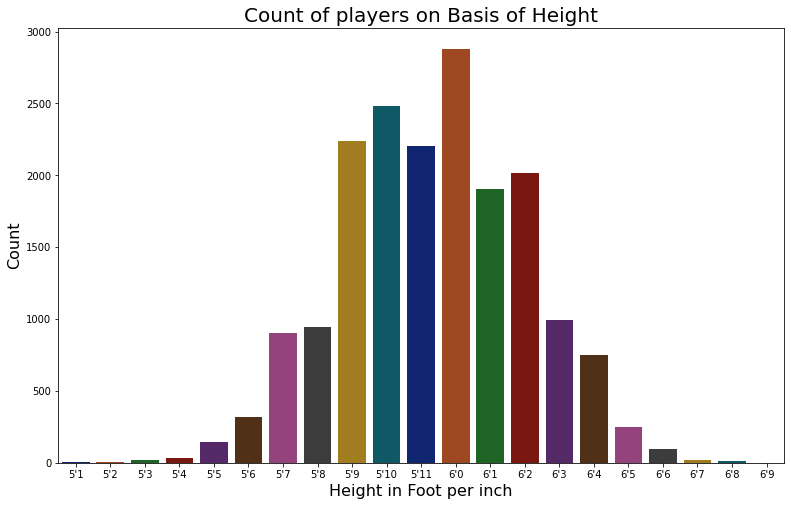

In [7]:
# Height of Players

plt.figure(figsize = (13, 8))
ax = sns.countplot(x='Height',data=data, palette = 'dark',order =["5'1",  "5'2", "5'3", "5'4", "5'5", "5'6", "5'7", "5'8", "5'9","5'10", "5'11", "6'0", "6'1", "6'2", "6'3", "6'4", "6'5", "6'6", "6'7", "6'8", "6'9"])
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

In [5]:
data['Weight'] = data['Weight'].apply(lambda x : int(x.strip('lbs')))
# data['Weight']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


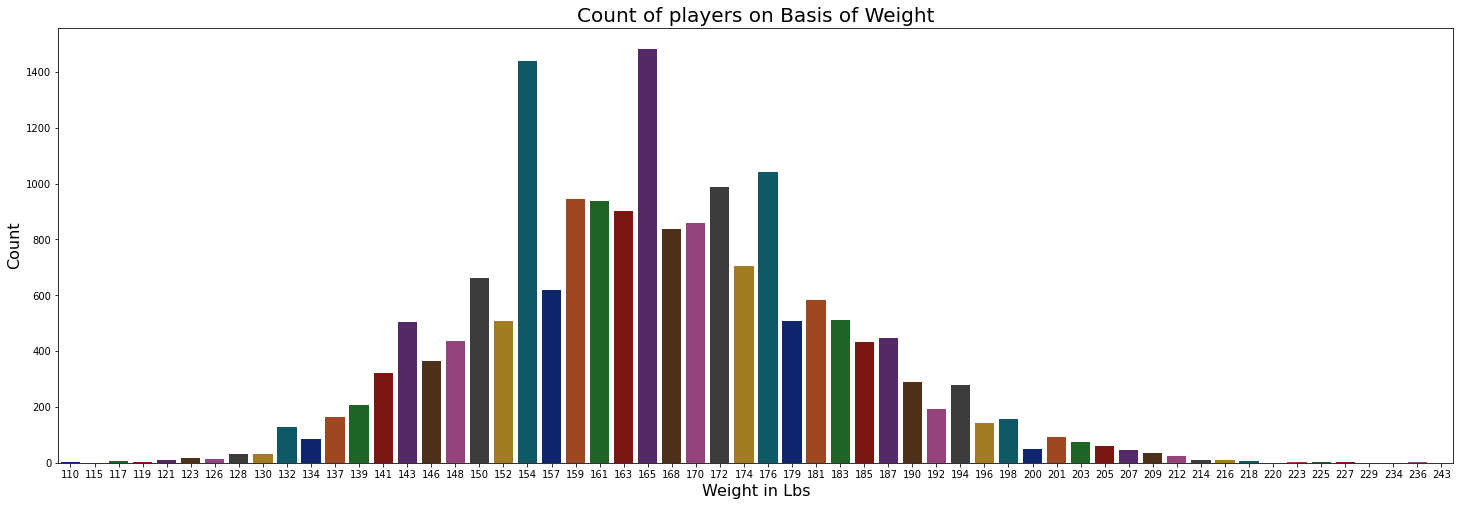

In [9]:
plt.figure(figsize = (25, 8))
ax = sns.countplot(data['Weight'].sort_values(), palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Weight', fontsize = 20)
ax.set_xlabel(xlabel = 'Weight in Lbs', fontsize = 16 )
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
# plt.xticks(rotation = 90)
plt.show()

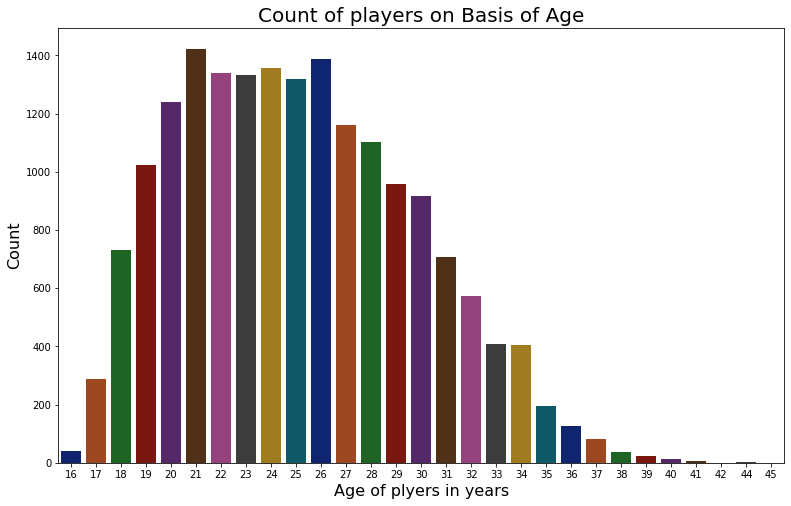

In [10]:
# Age of players
plt.figure(figsize = (13, 8))
ax = sns.countplot(x='Age',data=data, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Age', fontsize = 20)
ax.set_xlabel(xlabel = 'Age of plyers in years', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


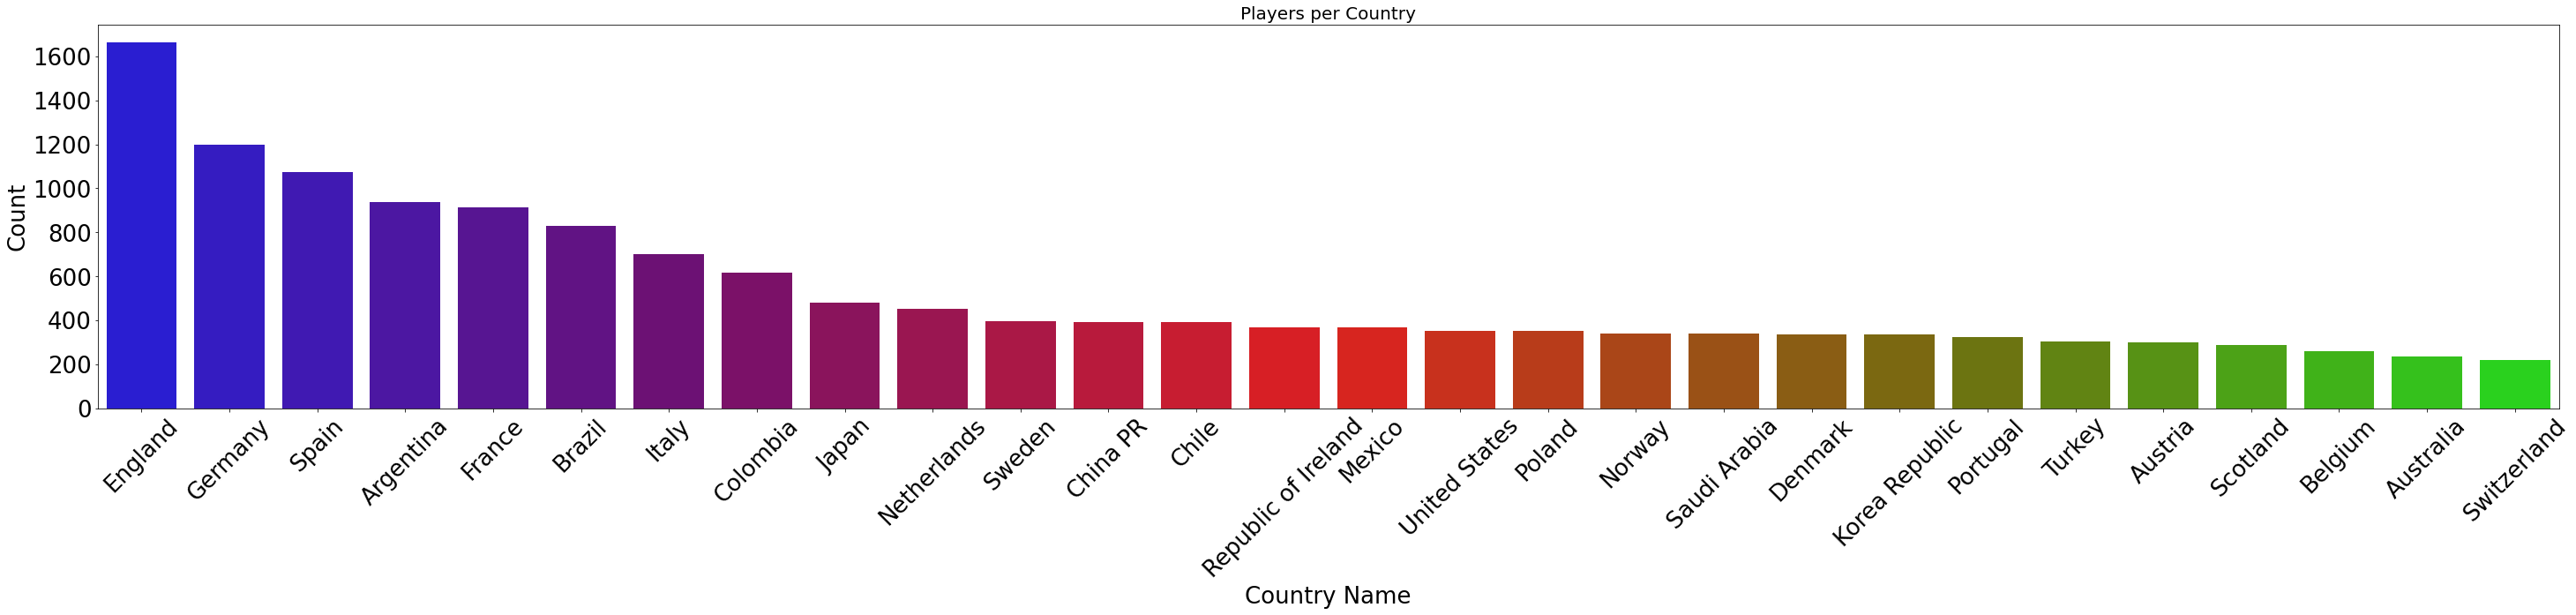

In [52]:
tm = data['Nationality'].value_counts()
tm = tm.apply(lambda x: int(x) if(x>200) else None)
tm = tm.dropna()

plt.figure(figsize = (50, 8))
# for label in (ax.get_xticklabels() + ax.get_yticklabels()):
# 	label.set_fontsize(26)
ax = sns.barplot(tm.keys(), tm.values, palette = 'brg'    )

ax.set_title(label = 'Players per Country', fontsize = 20)
ax.set_xlabel(xlabel = 'Country Name', fontsize = 26)
ax.set_ylabel(ylabel = 'Count', fontsize = 26)
plt.xticks(rotation=45,fontsize = 26)
plt.yticks(fontsize = 26)
plt.show()


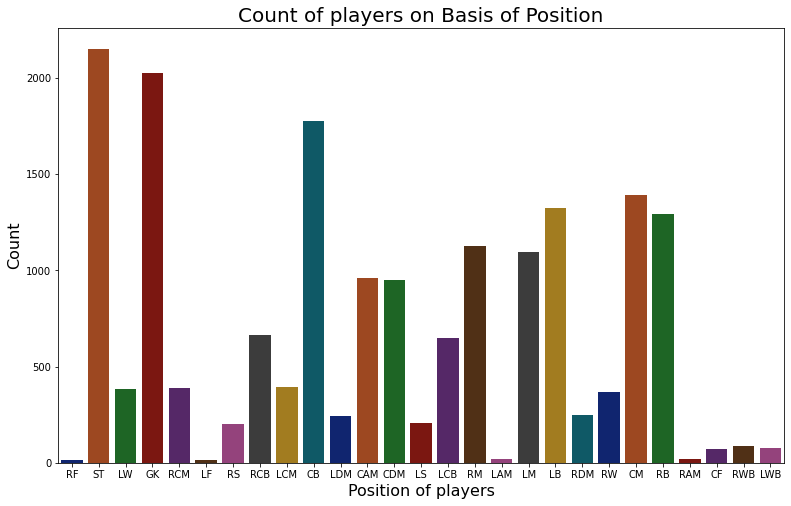

In [8]:
#position
plt.figure(figsize = (13, 8))
ax = sns.countplot(x='Position',data=data, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Position', fontsize = 20)
ax.set_xlabel(xlabel = 'Position of players', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

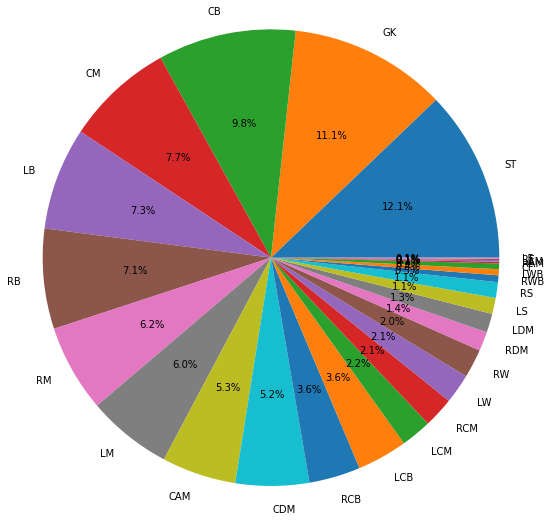

In [27]:
tq = data
# tqq = {}
tqq = tq['Position'].value_counts()
# type(tqq)
# tqq =tqq.tolist()
tqq['ST']
fig = plt.figure(figsize =(10, 7))
l = tqq.keys()
l = l.tolist()
plt.pie(tqq.values, labels = l,radius = 1.5,autopct='%1.1f%%')
  
# show plot
plt.show()

In [38]:
player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))
# Position CAM: Balance, Agility, Acceleration

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


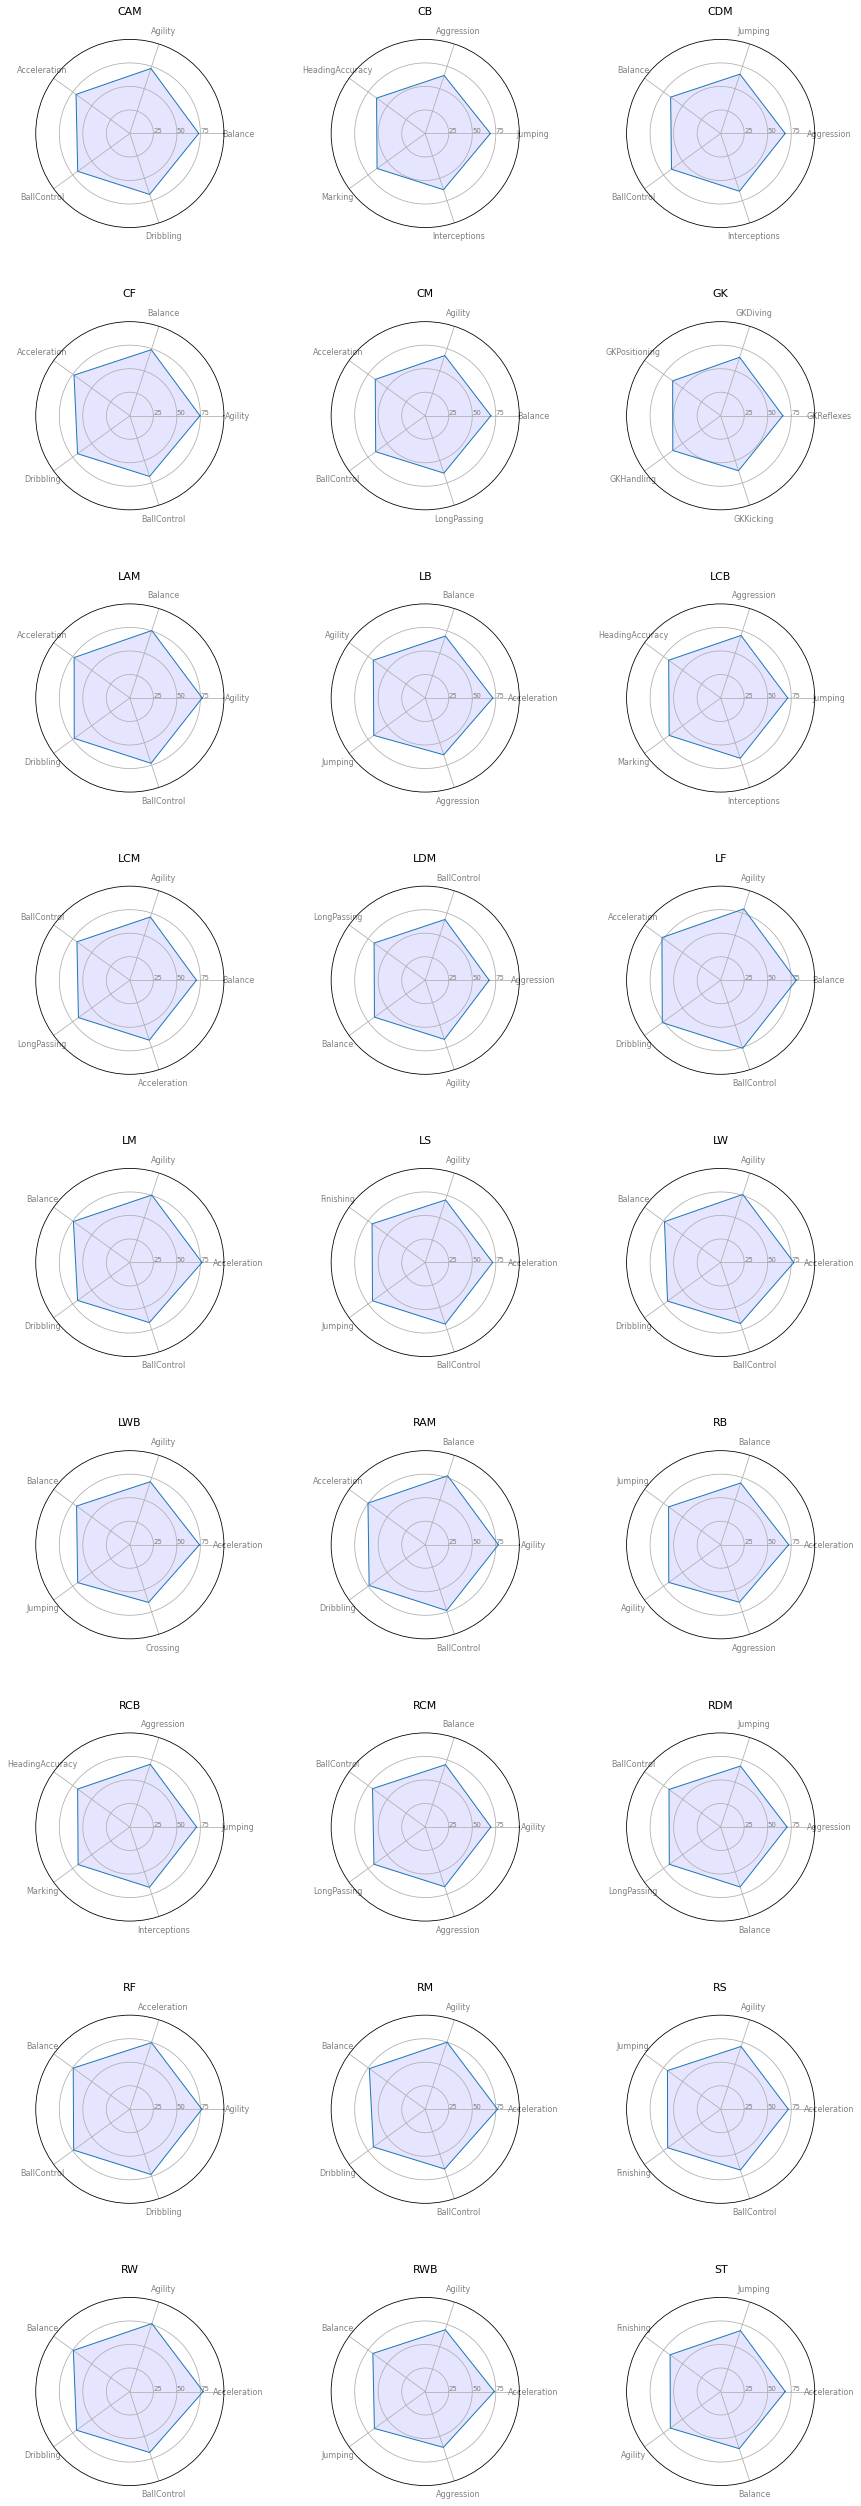

In [5]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


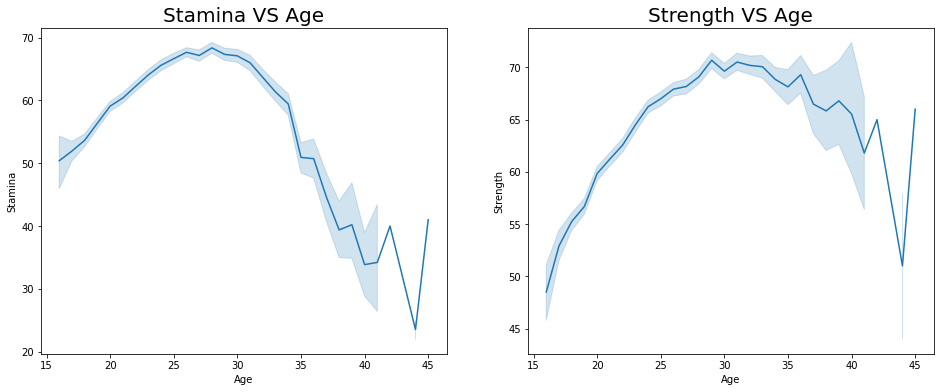

In [28]:
plt.subplots(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title('Stamina VS Age', fontsize = 20, fontweight = 15)
sns.lineplot(data["Age"], data["Stamina"])

plt.subplot(1, 2, 2)
plt.title('Strength VS Age', fontsize = 20, fontweight = 15)
sns.lineplot(data["Age"], data["Strength"])
plt.show()


***Best Players from each positions with their age, nationality, club based on their Overall Scores***



In [6]:
data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name',
                                                               'Age', 'Club', 'Nationality']].style.background_gradient('Reds')

,Position,Name,Age,Club,Nationality
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy
11,LCM,T. Kroos,28,Real Madrid,Germany


In [5]:
def wage_norm(x):
  x = x.strip('€')
  if(x[-1] == 'K'):
    x = float(x.strip("K"))
    return x
  if(x[-1] == 'M'):
    x=float(x.strip('M'))
  return float(x*1000)    

In [6]:
data['Wage'] = data["Wage"].apply(wage_norm)
data["Value"] = data["Value"].apply(wage_norm)

In [8]:
def clubdata(x):
  x = data[data.Club == x]
  return x
  

In [ ]:
barca = clubdata("FC Barcelona")
madrid = clubdata("Real Madrid")
atm = clubdata("Atlético Madrid")
city = clubdata("Manchester City")
bayern = clubdata("FC Bayern")
# ClubData.drop('No Club')
barca

In [65]:
vag = barca['Wage'].sum(axis=0)
vag

4837.0

In [64]:
vag = barca['Value'].sum(axis=0)
vag

852600.0

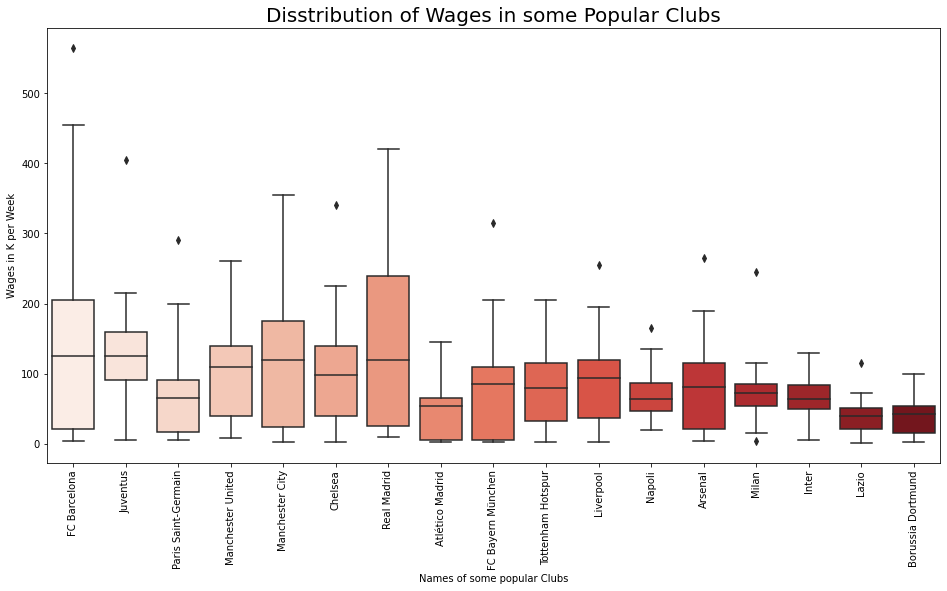

In [67]:
some_clubs = ('FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = data_club, palette = 'Reds')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Wages in K per Week', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data_club

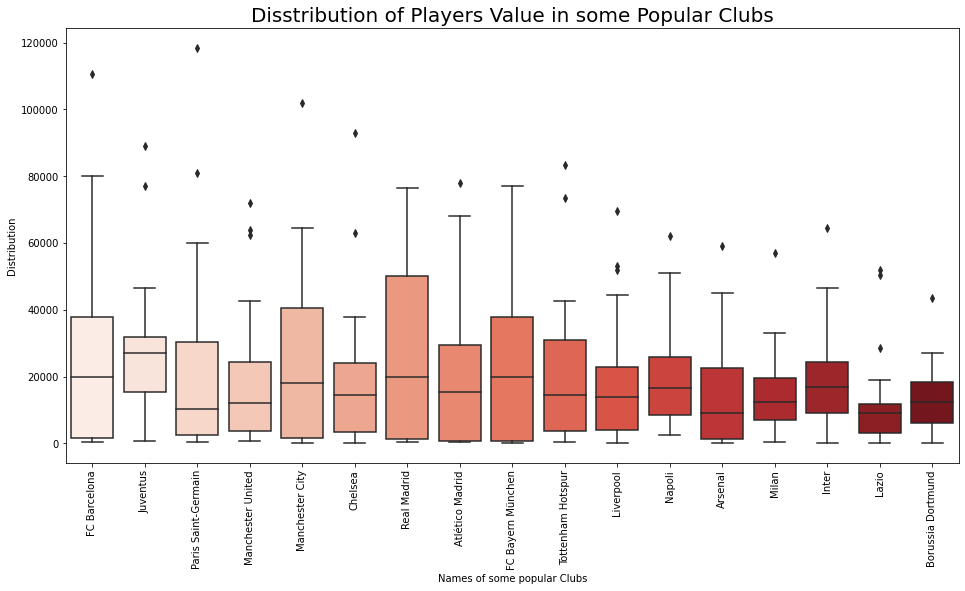

In [10]:
some_clubs = ('FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund')
data_club = data.loc[data['Club'].isin(some_clubs) & data['Value']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Value', data = data_club, palette = 'Reds')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Players Value in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data.head()

In [116]:
messi = data.iloc[0]
ronaldo = data.iloc[1]

messi = messi.values.tolist()  
messi = messi[54:83]

ronaldo = ronaldo.values.tolist()  
ronaldo = ronaldo[54:83]
m=0
r=0
for i in range(len(messi)):
  if messi[i]>ronaldo[i]:
    m = m+1
  else:
    r=r+1  
print('messi = '+str(m),"ronaldo = "+str(r))    

messi = 15 ronaldo = 14


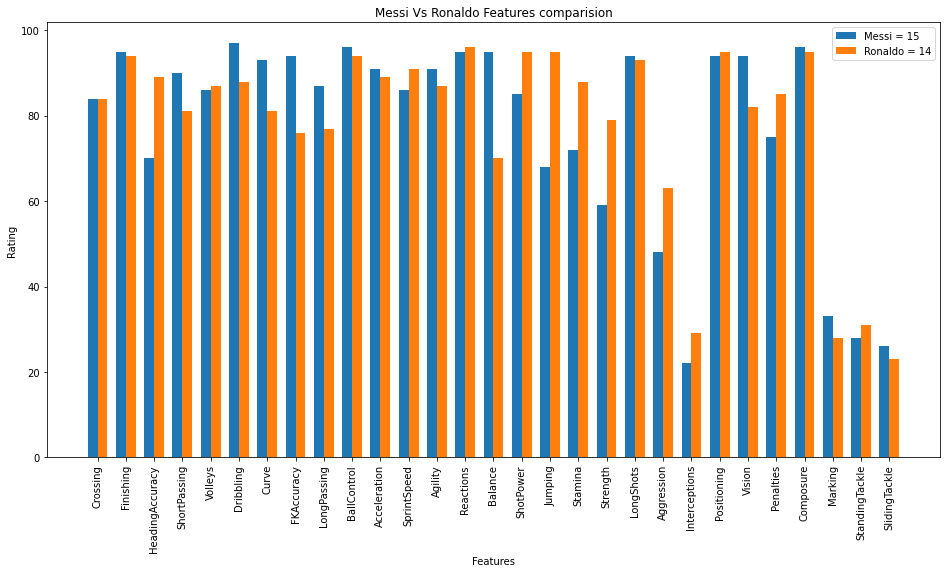

In [118]:
X = list(data)
X = X[54:83]
X
X_axis = np.arange(len(messi))
bw = 0.35  
plt.bar(X_axis, messi, bw ,label = 'Messi = 15')
plt.bar(X_axis+bw , ronaldo,bw, label = 'Ronaldo = 14')
  
plt.xticks(X_axis+bw/2, X,rotation=90)
plt.xlabel("Features")
plt.ylabel("Rating")
plt.title("Messi Vs Ronaldo Features comparision")
plt.legend()
plt.show()

In [46]:
# import urllib

def playerdata(x):
    return data.loc[x,:]

x = playerdata(0)  #lionel messi, id = 0.
pd.set_option('display.max_rows', 200)
x = pd.DataFrame(x)
print(x)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=400x300 at 0x7F6BDD12BBD0>
                                                                       0
Unnamed: 0                                                             0
ID                                                                158023
Name                                                            L. Messi
Age                                                                   31
Photo                     https://cdn.sofifa.org/players/4/19/158023.png
Nationality                                                    Argentina
Flag                                 https://cdn.sofifa.org/flags/52.png
Overall                                                               94
Potential                                                             94
Club                                                        FC Barcelona
Club Logo                   https://cdn.sofifa.org/teams/2/light/241.png
Value                                       